IMPORTING LIBRARIES

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

READING THE CSV FILE

In [66]:
df=pd.read_csv("diamonds.csv")
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


GET THE INFO ABOUT THE DATA

In [ ]:
print(df.info())

MATPLOT LIB

In [ ]:
# Scatter Plot
plt.scatter(df['carat'],df['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Carat Vs Price Scatter Plot')
plt.show()

In [ ]:
# BAR PLOT
plt.bar(df["cut"].unique(),df.groupby("cut")['price'].mean())
plt.xlabel('cut')
plt.ylabel('Average price')
plt.title("Average Price By Cut")
plt.show()

In [ ]:
plt.hist(df['price'],bins=20,edgecolor='black')
plt.title("DISTRIBUTION OF PRICES")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Box Plot
plt.boxplot(df["carat"],vert=False)
plt.title("Boxplot of carat")
plt.xlabel("carat")
plt.show()

In [ ]:
# pie chart
cut_count=df["cut"].value_counts()
plt.pie(cut_count.values,labels=cut_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Cut quality")
plt.show()

In [ ]:
# HEATMAP OF CORRELATION MATRIX
correlation=df[["carat","depth","table","price","x","y","z"]].corr()
plt.imshow(correlation,cmap="coolwarm",interpolation="none")
plt.colorbar()
plt.xticks(range(len(correlation)),correlation.columns,rotation=90)
plt.yticks(range(len(correlation)),correlation.columns)
plt.title("Heatmap Of Correlation Matrix")
plt.show()

In [ ]:
sns.heatmap(correlation,annot=True,cmap="coolwarm")

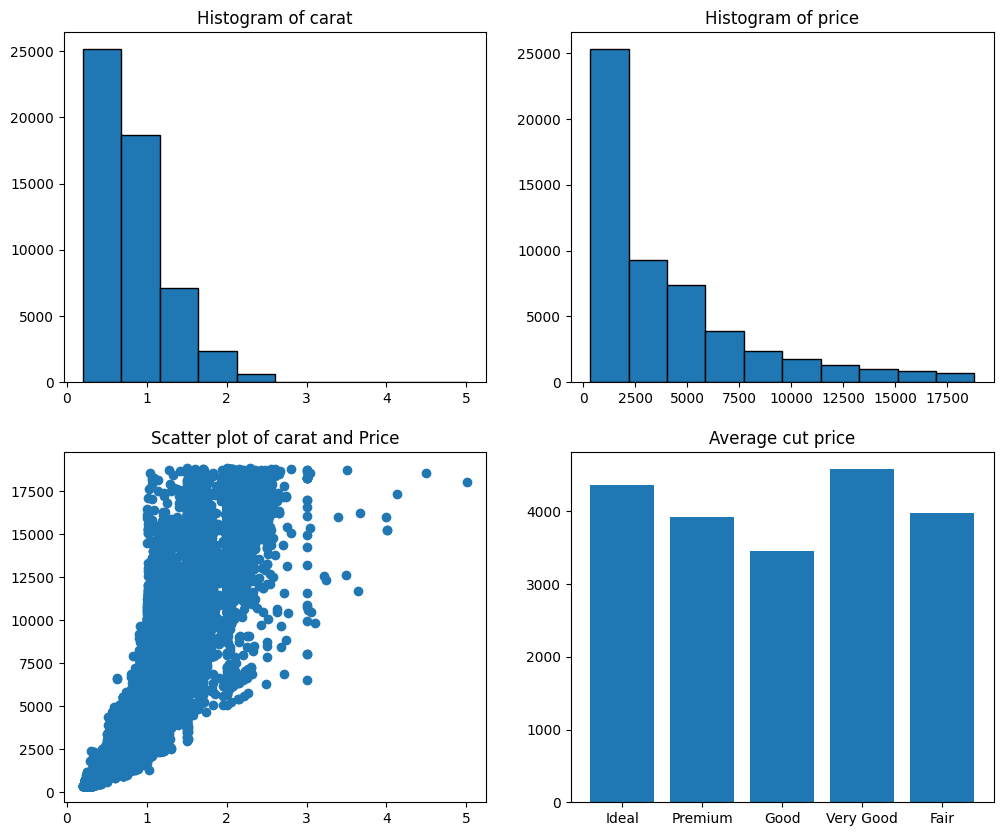

In [60]:
# Sub Plots
fig,ax=plt.subplots(2,2 ,figsize=(12,10))
ax[0,0].hist(df["carat"],bins=10,edgecolor='black')
ax[0,0].set_title("Histogram of carat")
ax[0,1].hist(df["price"],bins=10,edgecolor='black')
ax[0,1].set_title("Histogram of price")
ax[1,0].scatter(df["carat"],df["price"])
ax[1,0].set_title("Scatter plot of carat and Price")
ax[1,1].bar(df["cut"].unique(),df.groupby("cut")["price"].mean())
ax[1,1].set_title("Average cut price")
plt.show()

SEABORN

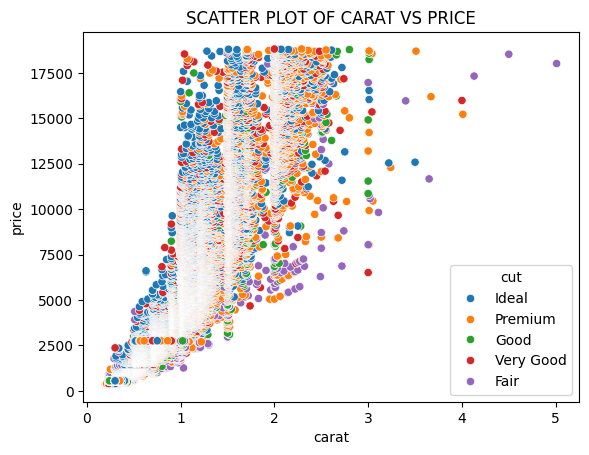

In [61]:
# SCATTER PLOT USING SNS
sns.scatterplot(x="carat",y="price",data=df,hue="cut")
plt.title("SCATTER PLOT OF CARAT VS PRICE")
plt.show()

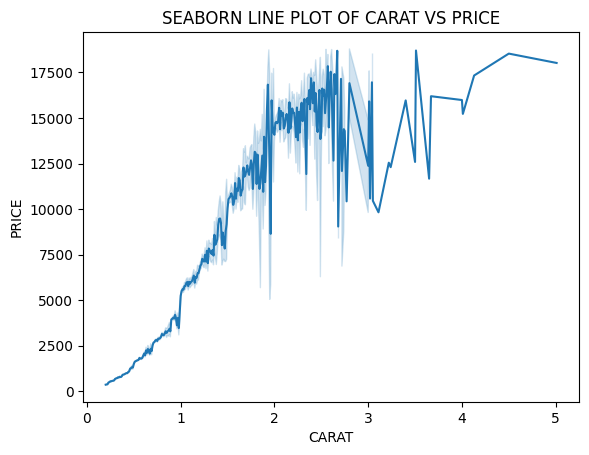

In [63]:
# SEABORN LINE PLOT
sns.lineplot(x="carat",y="price",data=df)
plt.title("SEABORN LINE PLOT OF CARAT VS PRICE")
plt.xlabel("CARAT")
plt.ylabel("PRICE")
plt.show()

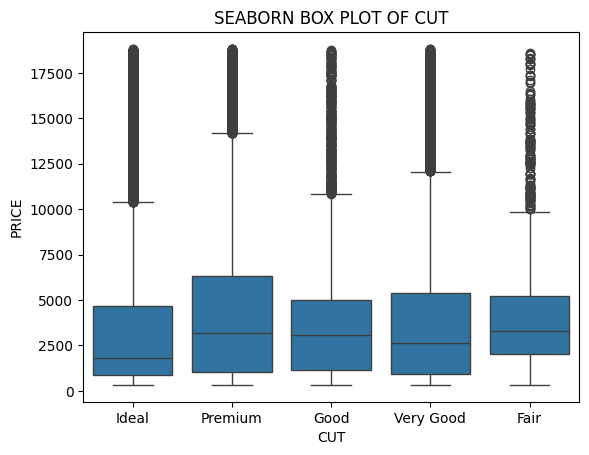

In [64]:
# BOX PLOT
sns.boxplot(x="cut",y="price",data=df)
plt.title("SEABORN BOX PLOT OF CUT")
plt.xlabel("CUT")
plt.ylabel("PRICE")
plt.show()

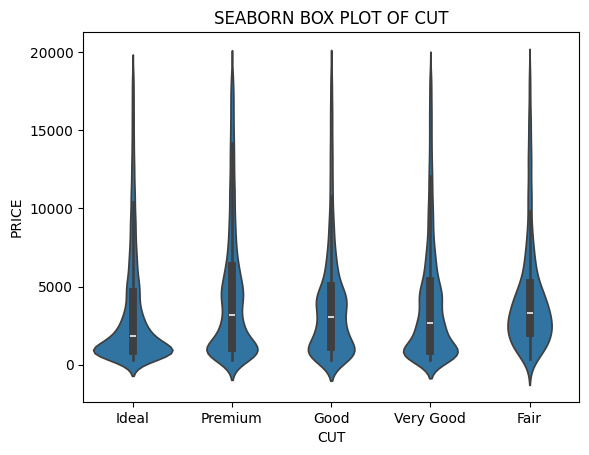

In [65]:
# VIOLIN  PLOT
sns.violinplot(x="cut",y="price",data=df)
plt.title("SEABORN BOX PLOT OF CUT")
plt.xlabel("CUT")
plt.ylabel("PRICE")
plt.show()

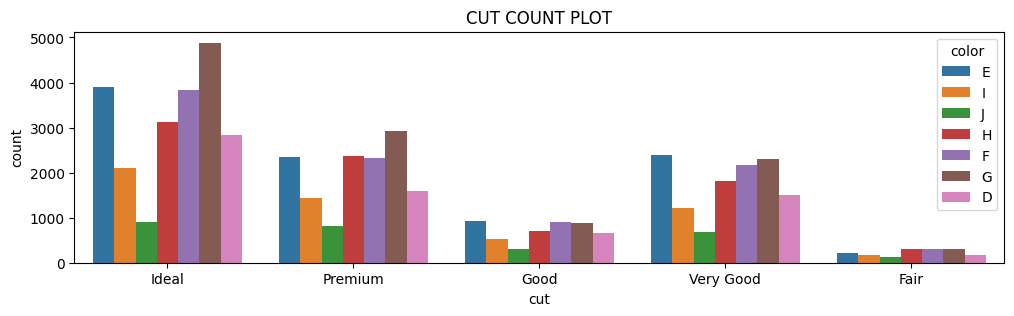

In [68]:
# COUNT PLOT
figure=plt.figure(figsize=(12,3))
sns.countplot(x="cut",data=df,hue="color")
plt.title("CUT COUNT PLOT")
plt.show()

THE MOST TIME TAKING PLOT IF DATA IS BIG
PAIR PLOT

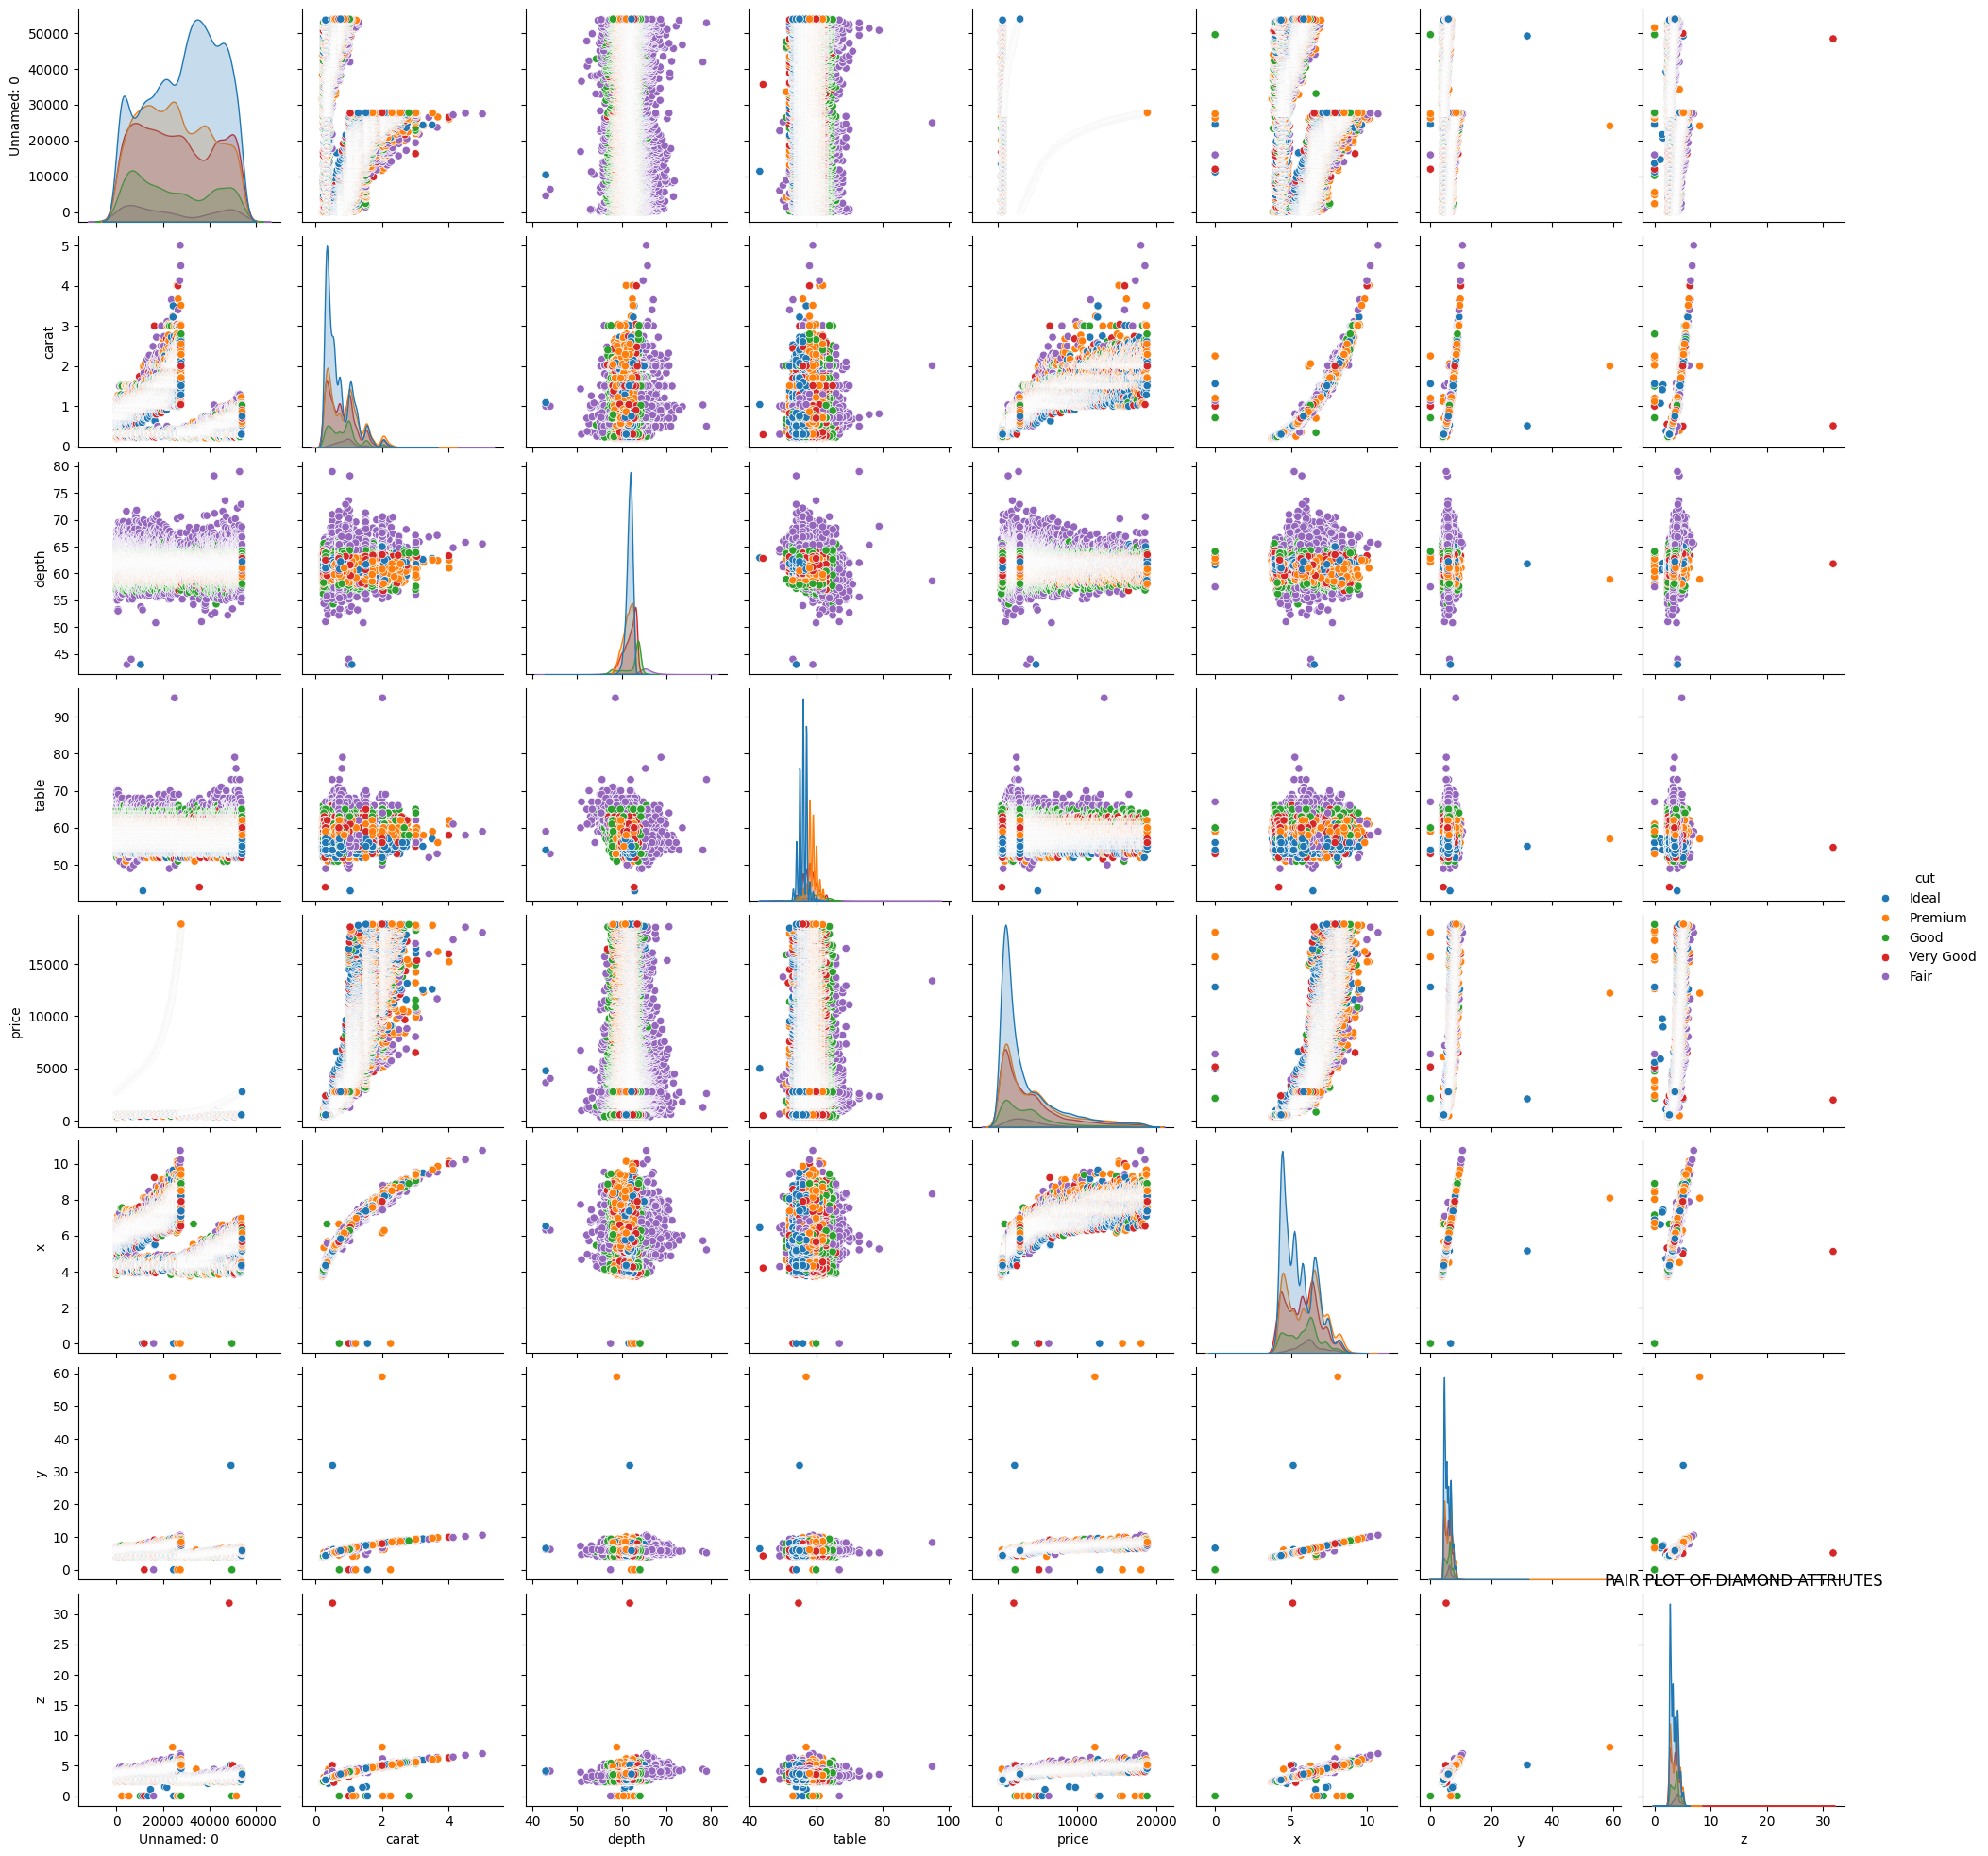

In [69]:
sns.pairplot(df,hue="cut")
plt.title("PAIR PLOT OF DIAMOND ATTRIUTES")
plt.show()

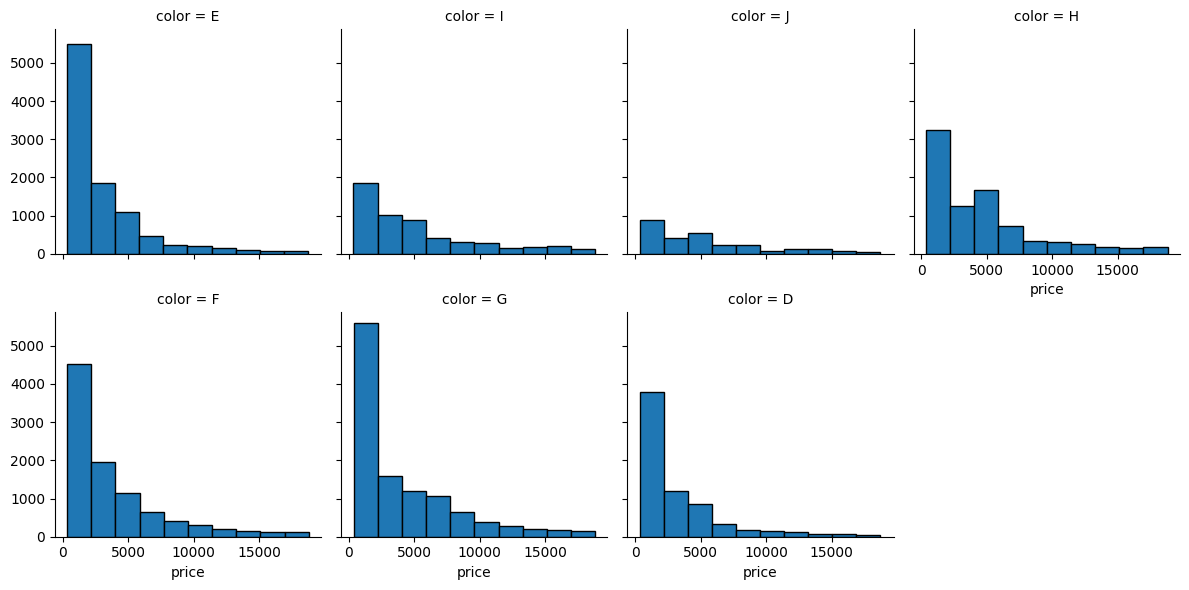

In [73]:
 #FACET GRID
 g= sns.FacetGrid(df,col="color",col_wrap=4)
 g.map(plt.hist,"price",bins=10,edgecolor='black')
 plt.show()



SETTING SEABORN STYLES AND CONTEXT

<Figure size 640x480 with 0 Axes>

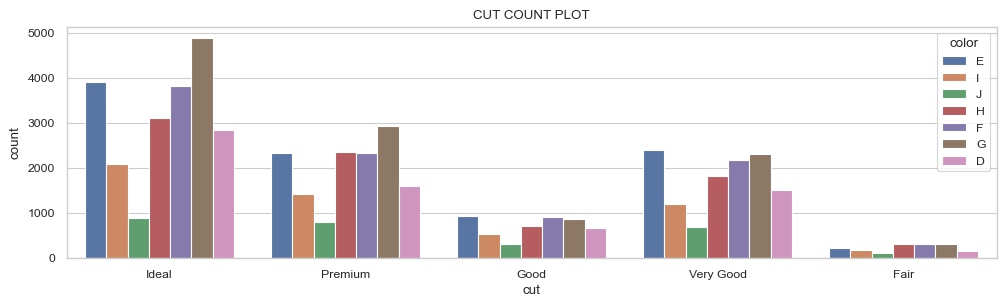

In [81]:
sns.set_style("whitegrid") #OPTIONS : whitegrid , darkrid , dark ,white, ticks
sns.set_context("paper") # OPTIONS: paper,poster,notebook , talk or a dictionary with your parameters
# sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep") # OPTIONS : deep.colorblind,pastel,dark,muted,bright
sns.despine() # REMOVE tHE RIGHT AND TOP SpINES
figure=plt.figure(figsize=(12,3))
sns.countplot(x="cut",data=df,hue="color")
plt.title("CUT COUNT PLOT")
plt.show()


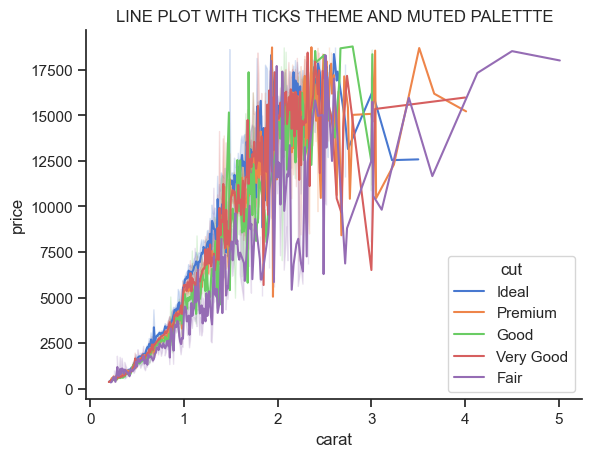

In [84]:
# SAVE FIGURE
sns.set_theme(style="ticks", palette="muted", context="notebook",font_scale=1.0)
sns.lineplot(x="carat",y="price",data=df,hue="cut")
sns.despine()
plt.title("LINE PLOT WITH TICKS THEME AND MUTED PALETTTE")
plt.savefig("line.png",dpi=300,bbox_inches="tight")
plt.show()

PLOTLY

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [90]:
# REMOVE WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [92]:
df=pd.read_csv("diamonds.csv")
print(df.shape)
df=df.sample(frac=0.1,random_state=10)
print(df.shape)

(53940, 11)
(5394, 11)


In [93]:
# RESETING THE INDEX
df.reset_index(drop=True,inplace=True)
print(df.head())

   Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0        8019   1.01    Premium     E     SI1   61.7   56.0   4330  6.44   
1        1584   0.70  Very Good     D     VS1   60.4   58.0   3008  5.71   
2        9139   1.13  Very Good     H     SI2   59.8   59.0   4537  6.75   
3        2788   0.76      Ideal     F     VS2   61.0   55.0   3257  5.89   
4       52430   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65   

      y     z  
0  6.39  3.96  
1  5.78  3.47  
2  6.82  4.06  
3  5.92  3.60  
4  5.69  3.47  


In [99]:
# SCATTER PLOT
fig=px.scatter(df,x="carat",y="price",color="cut",
               title="Scatter Plot of Carat vs Price",
               labels={"carat":"Carat Weight","price":"Price ($)"}
               )
fig.show()